In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

from mvmm.multi_view.block_diag.graph.linalg import get_sym_laplacian_bp, get_unnorm_laplacian_bp
from mvmm.linalg_utils import eigh_wrapper, svd_wrapper
from mvmm.viz_utils import simpleaxis

fig_dir = './figures/'
dpi = 200

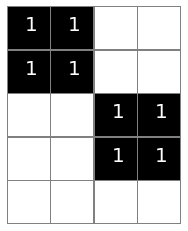

In [21]:
# X = [[1, 1, 0, 0],
#      [1, 1, 0, 0],
#      [0, 0, 1, 0],
#      [0, 0, 0, 0]]

# X = [[1, 1, 1, 0, 0],
#      [1, 1, 1, 0, 0],
#      [0, 0, 0, 1, 0],
#      [0, 0, 0, 0, 0]]

X = [[1, 1, 0, 0],
     [1, 1, 0, 0],
     [0, 0, 1, 1],
     [0, 0, 1, 1],
     [0, 0, 0, 0]]

# X = [[1, 0, 0],
#      [1, 0, 0],
#      [0, 1, 0],
#      [0, 0, 0]]


X = np.array(X)

plt.figure(figsize=(4, 4))
sns.heatmap(X.astype(float), 
            square=True, linewidths=.5, linecolor='grey',
            cmap='Greys', cbar=False)

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)


for i, j in product(range(X.shape[0]), range(X.shape[1])):
    if X[i, j] < 1:
        text = ''
    else:
        text = '1'
    plt.text(j + .4, i + .55, text, color='white', fontsize=20)
    

plt.savefig(fig_dir + 'lap_spect_compare_mat.png', bbox_inches='tight', dpi=dpi)

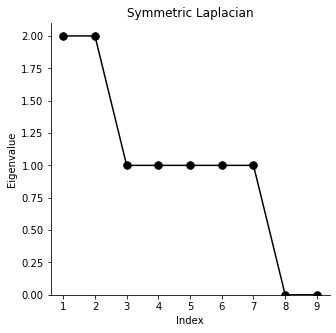

In [22]:
plt.figure(figsize=(5, 5))

L_sym = get_sym_laplacian_bp(X)
evals_sym = svd_wrapper(L_sym)[1]
    
plt.plot(evals_sym, marker='.', color='black', ms=15)
    
    
plt.title('Symmetric Laplacian')
plt.ylabel('Eigenvalue')
plt.xlabel('Index')
x_ticks = np.arange(len(evals_sym))
plt.xticks(x_ticks, x_ticks + 1)
plt.ylim(0)

simpleaxis(plt.gca())
plt.savefig(fig_dir + 'lap_spect_compare_mat_sym_evals.png', bbox_inches='tight', dpi=dpi)

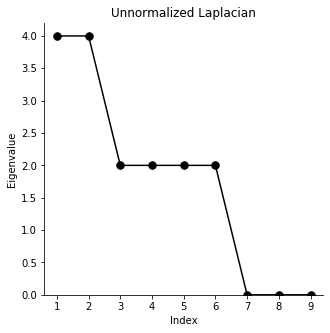

In [23]:
plt.figure(figsize=(5, 5))

L_un = get_unnorm_laplacian_bp(X)
evals_un = svd_wrapper(L_un)[1]

idxs = 1 +  np.arange(len(evals_un))
plt.plot(idxs, evals_un, marker='.', color='black', ms=15)

# zero_mask = evals_un < 1e-12
#plt.scatter(idxs[zero_mask], evals_un[zero_mask], color='black', s=100)

plt.title('Unnormalized Laplacian')
plt.ylabel('Eigenvalue')
plt.xlabel('Index')
x_ticks = 1 + np.arange(len(evals_un))
plt.xticks(x_ticks, x_ticks)
plt.ylim(0)
simpleaxis(plt.gca())
plt.savefig(fig_dir + 'lap_spect_compare_mat_un_evals.png', bbox_inches='tight', dpi=dpi)
